# Modern Methods of Data Analysis HW by Saradva Khushbu
Homework #1: Clustering methods (Part 1).

# Task 1 (4 points). Image clustering

You need to cluster one of the attached images (link or choose your own) using the colour description
of each pixel. You can add pixel coordinates as features. The clustering procedure outputs:

1.Cluster centroids (as pixel colours);

2.The compressed image where pixel colours are replaced with corresponding cluster centroid’s colour;

3.Compare the amount of memory needed to store the original and compressed image.

Choose the number of clusters ad hoc between 4 and 16. Here is a small tutorial about obtaining
colour description of a pixel.

In [1]:
#Import libraries
from imageio import imread
import matplotlib . pyplot as plt
%matplotlib inline
import numpy as np


Image shape: (1200, 1920, 3)


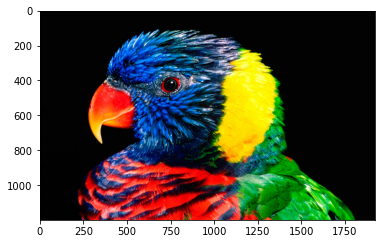

In [2]:
# Read and show image
import urllib.request
from PIL import Image
  
img1 = imread ("C:/Users/infob/Downloads/parrot4.jpg")
print("Image shape:" , img1.shape) # You can see , that images are stored as 3- dimensional arrays , where 3rd dimension contains RGB description of a pixel.
fig = plt.figure()
plt.imshow(img1)

In [3]:
# Prepare data
ind = np. indices ( img1 . shape [:2]) . transpose (1 ,2 ,0)
features = np. dstack (( ind , img1 )). reshape (-1, 5)

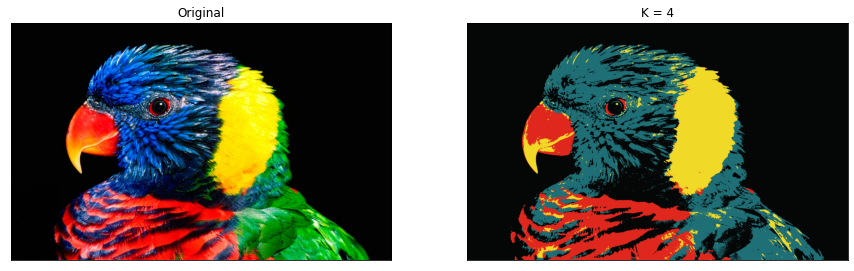

In [4]:
import cv2

original_image = cv2.imread("C:/Users/infob/Downloads/parrot4.jpg")
# Converting from BGR Colours Space to HSV
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
# convert to np.float32
vectorized = np.float32(vectorized)
# Here we are applying k-means clustering so that the pixels around a colour are consistent and gave same BGR/HSV values
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# We are going to cluster with k = 2, because the image will have just two colours ,a white background and the colour of the patch
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8
#now we have to access the labels to regenerate the clustered image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
#res2 is the result of the frame which has undergone k-means clustering
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

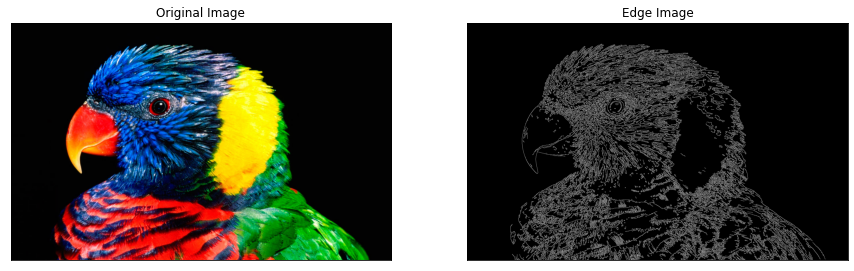

In [5]:
#canny edge detection
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


Image shape: (1200, 1920, 3)


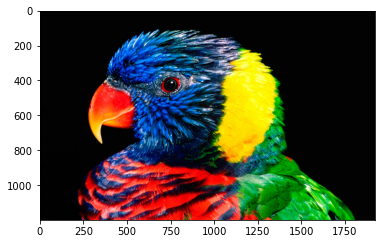

In [6]:
img1 = imread ("C:/Users/infob/Downloads/parrot4.jpg")
print("Image shape:" , img1.shape) # You can see , that images are stored as 3- dimensional arrays , where 3rd dimension contains RGB description of a pixel.
fig = plt.figure()
plt.imshow(img1)

# 1.1 Cluster centroids (as pixel colours);

In [7]:
img_np = np.asarray(img1)
img_np[0:2]
img_np.shape

(1200, 1920, 3)

In [8]:
pixels = img_np.reshape(img_np.shape[0] * img_np.shape[1],img_np.shape[2])
pixels.shape

(2304000, 3)

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++')
model = KMeans(n_clusters =16)
model.fit(pixels)

KMeans(n_clusters=16)

In [10]:
pixel_centroids = model.labels_ 
cluster_centers = model.cluster_centers_ 
pixel_centroids

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
cluster_centers

array([[ 80.70447158,  12.62940354,  22.91175915],
       [  2.50970366,   2.61338896,   3.18931412],
       [251.80829756, 227.57475014,   9.50571165],
       [ 75.73339223,  88.8138349 , 121.26147742],
       [164.40649799,  13.72378863,  17.41130613],
       [  4.26774067, 163.07302161,   8.87537917],
       [220.84218001, 207.6393041 , 189.18182141],
       [  6.44029247, 107.1034145 , 215.31221694],
       [  7.67948219,  65.06306605, 129.22063635],
       [246.12157507,  99.28619502,  70.15635865],
       [  6.19786156,  99.71150008,   8.62488516],
       [245.26424891,  25.24951292,  14.44444335],
       [ 10.5788784 ,  30.18246613,  65.2962208 ],
       [ 14.16550148, 173.23966606,  81.9278038 ],
       [127.73588194, 178.54686053,  30.16604041],
       [120.80523196, 160.47218192, 175.93855976]])

In [12]:
final = np.zeros((pixel_centroids.shape[0],3)) 
final.shape

(2304000, 3)

In [13]:
for cluster_no in range(16):
    final[pixel_centroids==cluster_no] = cluster_centers[cluster_no] 
final[0:5]

array([[2.50970366, 2.61338896, 3.18931412],
       [2.50970366, 2.61338896, 3.18931412],
       [2.50970366, 2.61338896, 3.18931412],
       [2.50970366, 2.61338896, 3.18931412],
       [2.50970366, 2.61338896, 3.18931412]])

In [14]:
comp_image = final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image = Image.fromarray(np.uint8(comp_image)) 
comp_image.save('dt_compressed.png')

I used matplotlib to plot the original and compressed images

# 1.2 The compressed image where pixel colours are replaced with corresponding cluster centroid’s colour;

Text(0.5, 1.0, 'Compressed Image')

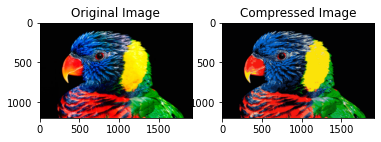

In [15]:
import matplotlib.image as mpimg 

plt.figure_size = 15

plt.subplot(1,2,1),plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(comp_image)
plt.title('Compressed Image')


In [16]:
import os

print('size of original image:', int(os.stat('C:/Users/infob/Downloads/parrot4.jpg').st_size/1024), 'kB')
print('size of compressed image:' ,int(os.stat('C:/Users/infob/dt_compressed.png').st_size/1024), 'kB')

size of original image: 376 kB
size of compressed image: 254 kB


# 1.3 Compare the amount of memory needed to store the original and compressed image

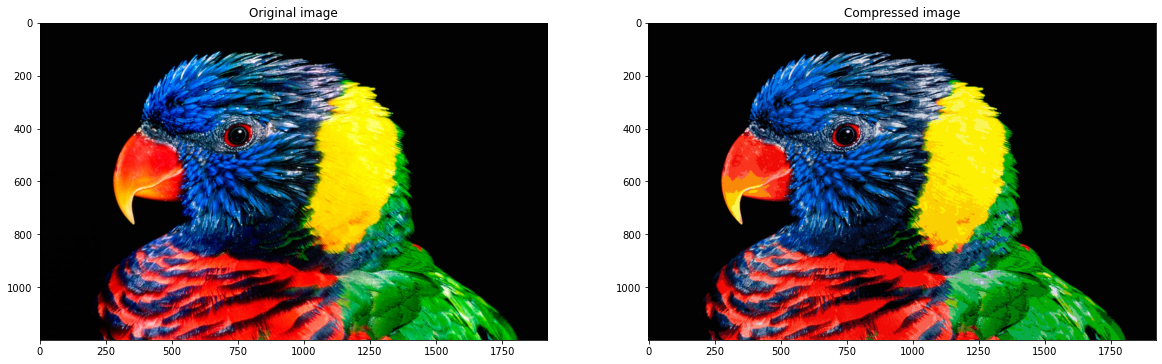

In [17]:
img = Image.open('C:/Users/infob/Downloads/parrot4.jpg')
img_np = np.asarray(img)
pixels = img_np.reshape(img_np.shape[0] * img_np.shape[1],img_np.shape[2])
model = KMeans(n_clusters =32)
model.fit(pixels)
pixel_centroids = model.labels_
cluster_centers = model.cluster_centers_
final = np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(32):
    final[pixel_centroids==cluster_no] = cluster_centers[cluster_no]
comp_image = final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image = Image.fromarray(np.uint8(comp_image))
comp_image.save('autumn_compressed.png')
img1 = mpimg.imread('C:/Users/infob/Downloads/parrot4.jpg')
img2 = mpimg.imread('autumn_compressed.png')
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.imshow(img1)
ax1.set_title('Original image')
ax2.imshow(img2)
ax2.set_title('Compressed image')
plt.show()

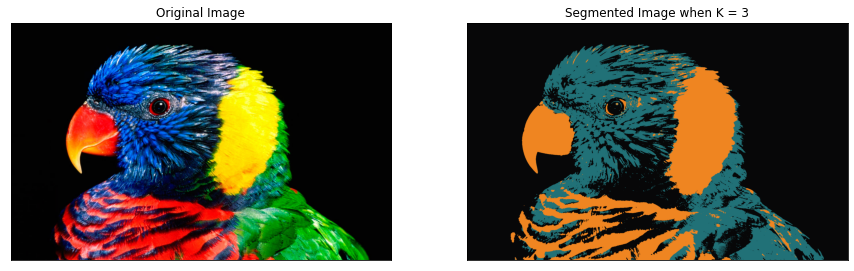

In [18]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

2. The compressed image where pixel colours are replaced with corresponding cluster centroid’s colour;

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
import cv2
from sklearn.preprocessing import StandardScaler
import random
from matplotlib import rcParams

In [20]:
dataset_path = 'C:/Users/infob/Downloads/parrot4.jpg'
images_filenames = glob.glob(dataset_path)
images_filenames[0]

'C:/Users/infob/Downloads/parrot4.jpg'

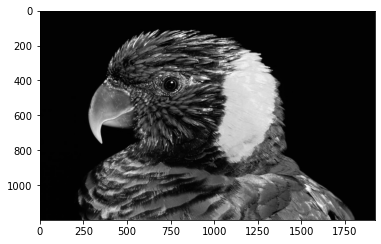

In [21]:
fig, ax = plt.subplots(1,1)
img = cv2.cvtColor(cv2.imread(images_filenames[0]), cv2.COLOR_BGR2GRAY)
ax.imshow(img, cmap="gray")

Image shape: (1200, 1920, 3)


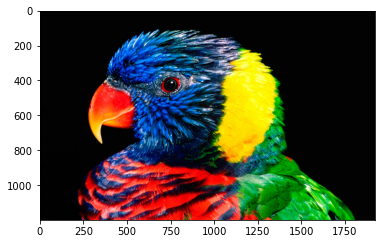

In [22]:
import urllib.request
from PIL import Image
  
img1 = imread ("C:/Users/infob/Downloads/parrot4.jpg")
print("Image shape:" , img1.shape) # You can see , that images are stored as 3- dimensional arrays , where 3rd dimension contains RGB description of a pixel.
fig = plt.figure()
plt.imshow(img1)

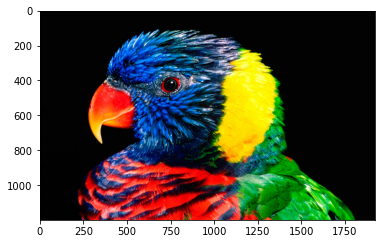

In [23]:
plt.imshow(img1)

In [24]:
(h,w,c) = img1.shape
img2D = img1.reshape(h*w,c)
print(img2D)
print(img2D.shape)

[[2 2 2]
 [2 2 2]
 [2 2 2]
 ...
 [2 2 2]
 [2 2 2]
 [2 2 2]]
(2304000, 3)


In [25]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=7) # we shall retain only 7 colors
cluster_labels = kmeans_model.fit_predict(img2D)

In [26]:
print(cluster_labels)

[0 0 0 ... 0 0 0]


In [27]:
from collections import Counter
labels_count = Counter(cluster_labels)
print(labels_count)

Counter({0: 1345573, 2: 226070, 3: 196039, 5: 162080, 1: 161839, 4: 124575, 6: 87824})


In [28]:
print(kmeans_model.cluster_centers_)

[[  4.85101904   3.71603941   4.84356434]
 [248.64230532 223.89684796  12.00385661]
 [ 25.37909483  52.55345943  94.4062934 ]
 [226.03300628  39.26383595  27.89161348]
 [ 17.84365947 103.01128239 190.67638964]
 [ 12.0370969  148.76102635  25.74844067]
 [163.82598185 168.75265703 167.64723122]]


In [29]:
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)

In [30]:
print(rgb_cols)

[[  5   4   5]
 [249 224  12]
 [ 25  53  94]
 [226  39  28]
 [ 18 103 191]
 [ 12 149  26]
 [164 169 168]]


In [31]:
img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))

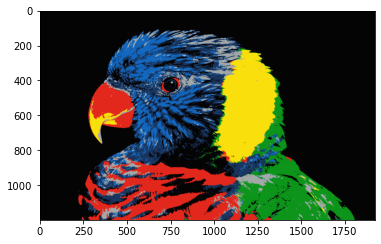

In [32]:
plt.imshow(img_quant)

Text(0.5, 1.0, 'Color Quantized Image')

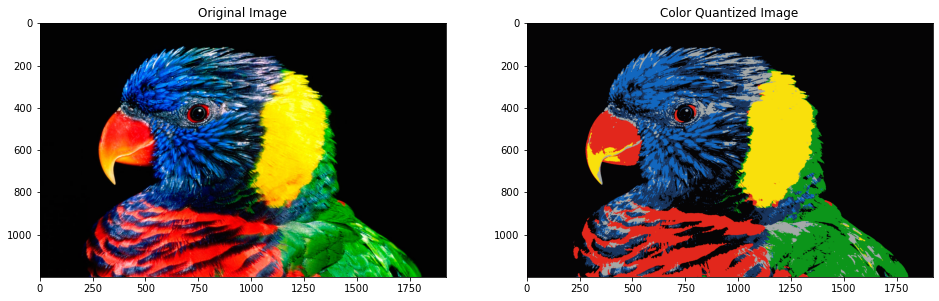

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(img1)
ax[0].set_title('Original Image')
ax[1].imshow(img_quant)
ax[1].set_title('Color Quantized Image')

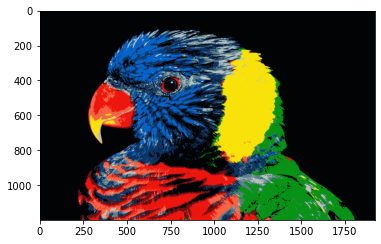

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread, imsave

n_colors = 10

sample_img = imread('C:/Users/infob/Downloads/parrot4.jpg')
w,h,_ = sample_img.shape
sample_img = sample_img.reshape(w*h,3)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)

# find out which cluster each pixel belongs to.
labels = kmeans.predict(sample_img)

# the cluster centroids is our color palette
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

# recolor the entire image
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]
    
# reshape for display
recolored_img = recolored_img.reshape(w,h,3)

imsave('kmeans_color_q.jpg', recolored_img)
plt.imshow(recolored_img)

In [35]:
# Prepare data
ind = np.indices(img1.shape[:2]).transpose(1,2,0)
features = np.dstack((ind,img1)).reshape(-1,5)


In [36]:
import cv2 

# load image as grayscale
img = cv2.imread('C:/Users/infob/Downloads/parrot4.jpg',0)

# get the positions of all pixels that are not full white (= triangle)
triangle_px = np.where( img <= 1800)
# dividing the sum of the values by the number of pixels
# to get the average location
ty = int(sum(triangle_px[0])/len(triangle_px[0]))
tx = int(sum(triangle_px[1])/len(triangle_px[1]))
# print location and draw filled black circle
print("Parrat ({},{})".format(tx,ty))
cv2.circle(img, (tx,ty), 10,(0), -1)


# the same process, but now with only white pixels
white_px = np.where( img > 240)
wy = int(sum(white_px[0])/len(white_px[0]))
wx = int(sum(white_px[1])/len(white_px[1]))
# print location and draw white filled circle
print("White: ({},{})".format(wx,wy))
cv2.circle(img, (wx,wy), 10,(255), -1)

# display result
cv2.imshow('Result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Parrat (959,599)
White: (1066,444)


[[ 14]
 [141]]


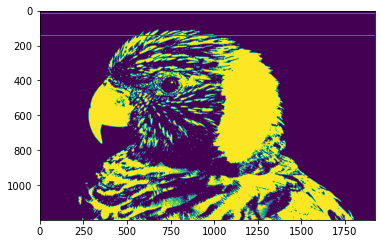

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread("C:/Users/infob/Downloads/parrot4.jpg", 0)
Z1 = image1.reshape((-1))

Z1 = np.float32(Z1)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K1 = 2

ret, mask, center =cv2.kmeans(Z1,K1,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
print(center)
res_image1 = center[mask.flatten()]
clustered_image1 = res_image1.reshape((image1.shape))

for c in center:
        plt.hlines(c, xmin=0, xmax=max(clustered_image1.shape[0], clustered_image1.shape[1]), lw=1.)

plt.imshow(clustered_image1)
plt.show()

# Task 2 (3 points). Determine the optimal number of clusters

Remember the K-Means method optimises the following criteria:

where R′i is the i-th cluster, ci is the centroid of the i-th cluster, yj is a data-point in i-th cluster, and
d(·, ·) is the distance between objects

The “Elbow method” is one of the approaches for making decisions on the number of clusters for the
K-Means method. The idea is to calculate the target function J(R) for every natural number k from a
certain range. The optimal number of clusters is defined as the value of k, starting with which the value
of J(R) does not decrease so sharply. For example, the number of classes defined by figure 1 can be
chosen equal to 4.

Using the data from elbow.txt (link) and the elbow method, define the optimal number of clusters.

Repeat the search with the help of Silhouette or Calinski-Harabasz scores (see our in-class tutorial).
Do they coincide?

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [39]:
elbow = pd.read_csv("C:/Users/infob/Downloads/elbow.txt", sep='\t', names=["x1", "x2"])
elbow.head()

x1                x2
0  -2,74771081120538  3,57568039479491
1  -1,93947260410004  1,65894642258313
2  -2,26492186954241  2,75451531504819
3  -1,96353080858923  3,24751981048039
4  -1,37966088492499  2,88519720034044

In [40]:
df = elbow.apply(lambda x: x.str.replace(',','.'))

df.head()

x1                x2
0  -2.74771081120538  3.57568039479491
1  -1.93947260410004  1.65894642258313
2  -2.26492186954241  2.75451531504819
3  -1.96353080858923  3.24751981048039
4  -1.37966088492499  2.88519720034044

In [41]:
df.describe()

x1                x2
count                 500               500
unique                500               500
top     -2.74771081120538  3.57568039479491
freq                    1                 1

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      500 non-null    object
 1   x2      500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [43]:
print(df.keys())

Index(['x1', 'x2'], dtype='object')


In [44]:
X = np.array(list(zip(df['x1'], df['x2']))).reshape(len(df['x1']), 2)
X

array([['-2.74771081120538', '3.57568039479491'],
       ['-1.93947260410004', '1.65894642258313'],
       ['-2.26492186954241', '2.75451531504819'],
       ['-1.96353080858923', '3.24751981048039'],
       ['-1.37966088492499', '2.88519720034044'],
       ['-2.74090838886317', '3.47878189916260'],
       ['-0.167633473058713', '2.65781460480297'],
       ['-1.80243560546456', '3.26259686947814'],
       ['-1.48526640957033', '2.73756239878398'],
       ['-0.556173508364686', '2.28019280152418'],
       ['-0.905902415205343', '3.70601837699779'],
       ['-2.31227693352478', '2.66346316405238'],
       ['-1.27360996067416', '2.71641439080052'],
       ['-0.315465504907689', '3.76464764443422'],
       ['-1.68276307038398', '2.33429541369661'],
       ['-1.68027251948084', '1.93545020772076'],
       ['-0.741836773929185', '2.49044094923689'],
       ['-1.67275177252728', '2.20884120039852'],
       ['-3.24837198689508', '3.02090449275695'],
       ['-0.703231182560720', '3.032717230620

In [45]:
df.sort_values(by=['x1','x2'])

x1                  x2
230  -0.00832641866389757   0.499506329710565
246   -0.0213351909296655  -0.563337372528897
253   -0.0406547927302640   0.295964950660456
296   -0.0448895144681532   0.369693559952986
200   -0.0488556967377717   0.345026642008021
..                    ...                 ...
441      5.95730424751992   -1.56672495627262
446      5.95766207835157   0.161874171324674
490      6.37179896817156   0.525420168609953
423      6.84264274333761   -1.15711326836955
494      7.43049392675524    1.90117543085337

[500 rows x 2 columns]

In [46]:
df['x2'].agg(['min', 'max'])

min    -0.00704898377274410
max        4.71278407910159
Name: x2, dtype: object

In [47]:
import warnings
warnings.filterwarnings("ignore")

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

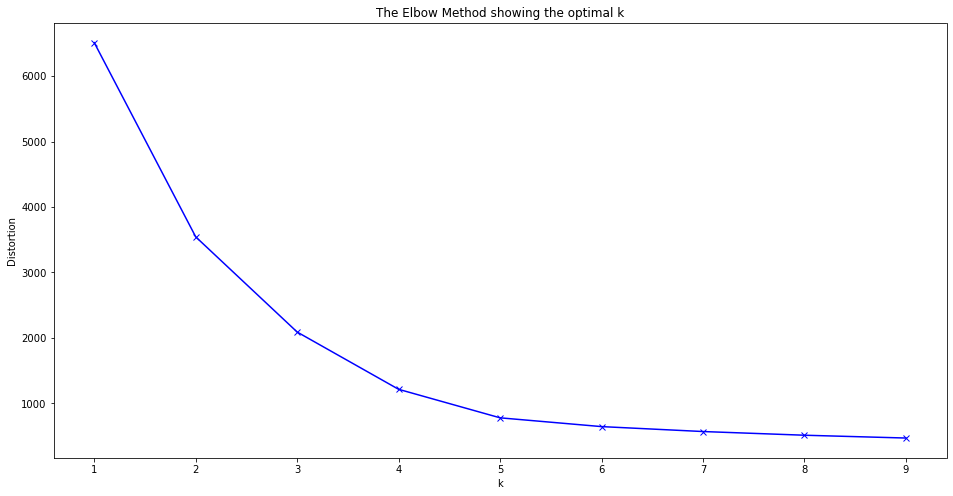

In [48]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

<AxesSubplot:>

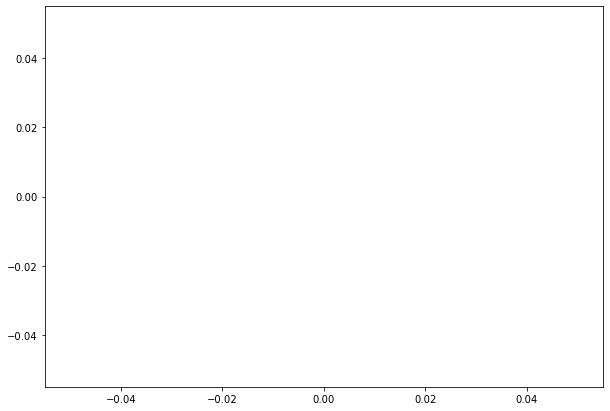

In [54]:
import seaborn as sns
fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df)

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

print(df.shape) # (344, 9)
df = df[['x1', 'x2']]
df = df.dropna(axis=0)

(500, 2)


NameError: name 'clustering' is not defined

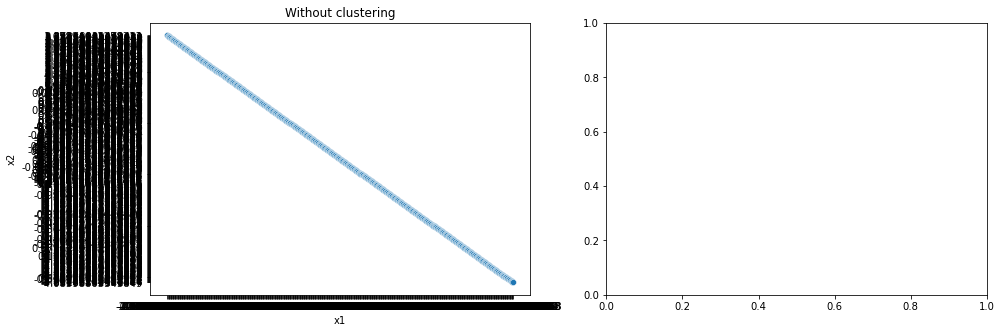

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='x1', y='x2').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='x1', y='x2', hue=clustering.labels_).set_title('Using the elbow method');

In [55]:
# Train K-Means with a different number of clusters and see 
# how the sum of the squared distances to the centroids of the clusters has changed

import warnings
warnings.filterwarnings("ignore")

J = []
params = np.arange(1, 40)
for k in params:
    kmeans = KMeans(n_clusters=k, random_state=10, max_iter=1000)
    kmeans.fit(X)
    J.append(kmeans.inertia_)
J = np.array(J)

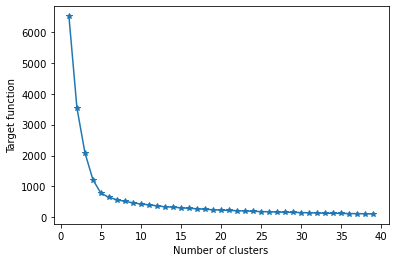

In [56]:
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Target function')
plt.show()

In [57]:
J

array([6511.78321308, 3544.01720492, 2089.38862495, 1214.39188981,
        778.56590351,  644.40212199,  569.01961541,  512.99782262,
        469.72023492,  427.93053941,  403.80316109,  370.29661078,
        340.7636877 ,  326.95142225,  304.68346861,  291.42013029,
        275.17939967,  257.86218833,  244.51388163,  231.02716831,
        219.83132203,  214.34595646,  202.8618575 ,  194.36881928,
        183.98646555,  179.06557292,  168.23087932,  163.14743072,
        158.30408617,  151.63573675,  145.49681603,  137.73765835,
        128.22930027,  130.09631399,  123.85785682,  119.83694763,
        119.09377238,  112.34982057,  108.74509421])

In [58]:
(J[1:-1]-J[2:])

array([ 1.45462858e+03,  8.74996735e+02,  4.35825986e+02,  1.34163782e+02,
        7.53825066e+01,  5.60217928e+01,  4.32775877e+01,  4.17896955e+01,
        2.41273783e+01,  3.35065503e+01,  2.95329231e+01,  1.38122655e+01,
        2.22679536e+01,  1.32633383e+01,  1.62407306e+01,  1.73172113e+01,
        1.33483067e+01,  1.34867133e+01,  1.11958463e+01,  5.48536556e+00,
        1.14840990e+01,  8.49303822e+00,  1.03823537e+01,  4.92089263e+00,
        1.08346936e+01,  5.08344859e+00,  4.84334455e+00,  6.66834942e+00,
        6.13892072e+00,  7.75915769e+00,  9.50835808e+00, -1.86701372e+00,
        6.23845718e+00,  4.02090918e+00,  7.43175249e-01,  6.74395181e+00,
        3.60472637e+00])

In [59]:
J[:-2]-J[1:-1]

array([ 2.96776601e+03,  1.45462858e+03,  8.74996735e+02,  4.35825986e+02,
        1.34163782e+02,  7.53825066e+01,  5.60217928e+01,  4.32775877e+01,
        4.17896955e+01,  2.41273783e+01,  3.35065503e+01,  2.95329231e+01,
        1.38122655e+01,  2.22679536e+01,  1.32633383e+01,  1.62407306e+01,
        1.73172113e+01,  1.33483067e+01,  1.34867133e+01,  1.11958463e+01,
        5.48536556e+00,  1.14840990e+01,  8.49303822e+00,  1.03823537e+01,
        4.92089263e+00,  1.08346936e+01,  5.08344859e+00,  4.84334455e+00,
        6.66834942e+00,  6.13892072e+00,  7.75915769e+00,  9.50835808e+00,
       -1.86701372e+00,  6.23845718e+00,  4.02090918e+00,  7.43175249e-01,
        6.74395181e+00])

In [60]:
(J[1:-1]-J[2:])/(J[:-2]-J[1:-1])

array([ 0.49014261,  0.60152588,  0.4980887 ,  0.30783796,  0.56186927,
        0.74316702,  0.77251344,  0.9656198 ,  0.57735234,  1.38873565,
        0.88140745,  0.46769043,  1.61218692,  0.59562448,  1.22448287,
        1.06628278,  0.77081156,  1.01036885,  0.83013897,  0.48994649,
        2.09358863,  0.73954763,  1.22245461,  0.47396696,  2.20177403,
        0.4691825 ,  0.95276749,  1.37680674,  0.92060574,  1.26392864,
        1.22543689, -0.19635501, -3.34140939,  0.64453583,  0.18482766,
        9.07451078,  0.53451247])

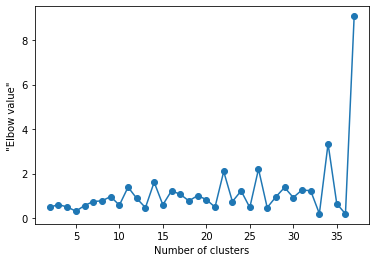

In [61]:
D = np.abs(J[1:-1]-J[2:])/np.abs(J[:-2] - J[1:-1])
plt.plot(params[1:-2], D[:-1], '-o')
plt.xlabel('Number of clusters')
plt.ylabel('\"Elbow value\"')
plt.show()

In [62]:
def pairplot(X, y, colors):
    fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], figsize=(15,15))

    for i in range(X.shape[1]): # use xrange for Python 2
        for j in range(X.shape[1]):
            if i == j:
                #axes[i, j].hist(X[:, i], 15)
                axes[i, j].scatter(X[:, i], X[:, i], c=colors[y])
            else:
                axes[i, j].scatter(X[:, i], X[:, j], c=colors[y])
            if X.shape[1] - 1:
                axes[i, j].set_xlabel(j)
            if j == 0:
                axes[i, j].set_ylabel(i)

# Task 3 (3 points). Hierarchical clustering

The database in file nutrient.dat (link) contains information about various types of meat, fish and
poultry: energy values (calories), protein (grams), fats (grams), calcium (milligrams) and iron (milligrams).

1. Perform Agglomerative clustering of objects with different types of linkage: single, complete and
average.

2. Draw the resulting dendrograms.

3. Select a threshold, form clusters and try to interpret them.

4. Perform steps 1-3 with features instead of objects.

We encourage you to use Python 3 libraries or Orange (https://orange.biolab.si/) for this task.

In [63]:
datContent = [i.strip().split() for i in open("C:/Users/infob/Downloads/nutrient.dat").readlines()]
datContent

[['ï»¿BEEF', 'BRAISED', '340', '20', '28', '9', '2.6'],
 ['HAMBURGER', '245', '21', '17', '9', '2.7'],
 ['BEEF', 'ROAST', '420', '15', '39', '7', '2.0'],
 ['BEEF', 'STEAK', '375', '19', '32', '9', '2.6'],
 ['BEEF', 'CANNED', '180', '22', '10', '17', '3.7'],
 ['CHICKEN', 'BROILED', '115', '20', '3', '8', '1.4'],
 ['CHICKEN', 'CANNED', '170', '25', '7', '12', '1.5'],
 ['BEEF', 'HEART', '160', '26', '5', '14', '5.9'],
 ['LAMB', 'LEG', 'ROAST', '265', '20', '20', '9', '2.6'],
 ['LAMB', 'SHOULDER', 'ROAST', '300', '18', '25', '9', '2.3'],
 ['SMOKED', 'HAM', '340', '20', '28', '9', '2.5'],
 ['PORK', 'ROAST', '340', '19', '29', '9', '2.5'],
 ['PORK', 'SIMMERED', '355', '19', '30', '9', '2.4'],
 ['BEEF', 'TONGUE', '205', '18', '14', '7', '2.5'],
 ['VEAL', 'CUTLET', '185', '23', '9', '9', '2.7'],
 ['BLUEFISH', 'BAKED', '135', '22', '4', '25', '.6'],
 ['CLAMS', 'RAW', '70', '11', '1', '82', '6.0'],
 ['CLAMS', 'CANNED', '45', '7', '1', '74', '5.4'],
 ['CRABMEAT', 'CANNED', '90', '14', '2', '38', 

In [64]:
# warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/infob/Downloads/nutrient.dat", delimiter='\t',encoding='utf8')
data

BEEF BRAISED           340   20   28     9   2.6
0   HAMBURGER              245   21   17     9   2.7
1   BEEF ROAST             420   15   39     7   2.0
2   BEEF STEAK             375   19   32     9   2.6
3   BEEF CANNED            180   22   10    17   3.7
4   CHICKEN BROILED        115   20    3     8   1.4
5   CHICKEN CANNED         170   25    7    12   1.5
6   BEEF HEART             160   26    5    14   5.9
7   LAMB LEG ROAST         265   20   20     9   2.6
8   LAMB SHOULDER ROAST    300   18   25     9   2.3
9   SMOKED HAM             340   20   28     9   2.5
10  PORK ROAST             340   19   29     9   2.5
11  PORK SIMMERED          355   19   30     9   2.4
12  BEEF TONGUE            205   18   14     7   2.5
13  VEAL CUTLET            185   23    9     9   2.7
14  BLUEFISH BAKED         135   22    4    25    .6
15  CLAMS RAW               70   11    1    82   6.0
16  CLAMS CANNED            45    7    1    74   5.4
17  CRABMEAT CANNED         90   14    2    38    .8
18  HADDOCK FRIED          135   16    5    15    .5
19  MACKEREL BROILED       200   19   13     5   1.0
20  MACKEREL CANNED        155   16    9   157   1.8
21  PERCH FRIED            195   16   11    14   1.3
22  SALMON CANNED          120   17    5   159   0.7
23  SARDINES CANNED        180   22    9   367   2.5
24  TUNA CANNED            170   25    7     7   1.2
25  SHRIMP CANNED          110   23    1    98   2.6

In [65]:
file = "C:/Users/infob/Downloads/nutrient.dat" #fix your path to avoid conflicts 

colnames = ["meat_type","energy_values(calories)","protein(grams)","fats(grams)","calcium(milligrams)","iron (milligrams)"]
import pandas as pd
df = pd.read_fwf(file, names=colnames)
df

meat_type  energy_values(calories)  protein(grams)  fats(grams)  \
0          BEEF BRAISED                      340              20           28   
1             HAMBURGER                      245              21           17   
2            BEEF ROAST                      420              15           39   
3            BEEF STEAK                      375              19           32   
4           BEEF CANNED                      180              22           10   
5       CHICKEN BROILED                      115              20            3   
6        CHICKEN CANNED                      170              25            7   
7            BEEF HEART                      160              26            5   
8        LAMB LEG ROAST                      265              20           20   
9   LAMB SHOULDER ROAST                      300              18           25   
10           SMOKED HAM                      340              20           28   
11           PORK ROAST                      340              19           29   
12        PORK SIMMERED                      355              19           30   
13          BEEF TONGUE                      205              18           14   
14          VEAL CUTLET                      185              23            9   
15       BLUEFISH BAKED                      135              22            4   
16            CLAMS RAW                       70              11            1   
17         CLAMS CANNED                       45               7            1   
18      CRABMEAT CANNED                       90              14            2   
19        HADDOCK FRIED                      135              16            5   
20     MACKEREL BROILED                      200              19           13   
21      MACKEREL CANNED                      155              16            9   
22          PERCH FRIED                      195              16           11   
23        SALMON CANNED                      120              17            5   
24      SARDINES CANNED                      180              22            9   
25          TUNA CANNED                      170              25            7   
26        SHRIMP CANNED                      110              23            1   

    calcium(milligrams)  iron (milligrams)  
0                     9                2.6  
1                     9                2.7  
2                     7                2.0  
3                     9                2.6  
4                    17                3.7  
5                     8                1.4  
6                    12                1.5  
7                    14                5.9  
8                     9                2.6  
9                     9                2.3  
10                    9                2.5  
11                    9                2.5  
12                    9                2.4  
13                    7                2.5  
14                    9                2.7  
15                   25                0.6  
16                   82                6.0  
17                   74                5.4  
18                   38                0.8  
19                   15                0.5  
20                    5                1.0  
21                  157                1.8  
22                   14                1.3  
23                  159                0.7  
24                  367                2.5  
25                    7                1.2  
26                   98                2.6

# 3.1 : Perform Agglomerative clustering of objects with different types of linkage: single, complete and average.

In [66]:
df.isnull().sum()

meat_type                  0
energy_values(calories)    0
protein(grams)             0
fats(grams)                0
calcium(milligrams)        0
iron (milligrams)          0
dtype: int64

In [67]:
df.describe()

energy_values(calories)  protein(grams)  fats(grams)  \
count                27.000000       27.000000    27.000000   
mean                207.407407       19.000000    13.481481   
std                 101.207806        4.251696    11.257033   
min                  45.000000        7.000000     1.000000   
25%                 135.000000       16.500000     5.000000   
50%                 180.000000       19.000000     9.000000   
75%                 282.500000       22.000000    22.500000   
max                 420.000000       26.000000    39.000000   

       calcium(milligrams)  iron (milligrams)  
count            27.000000          27.000000  
mean             43.962963           2.381481  
std              78.034254           1.461305  
min               5.000000           0.500000  
25%               9.000000           1.350000  
50%               9.000000           2.500000  
75%              31.500000           2.600000  
max             367.000000           6.000000

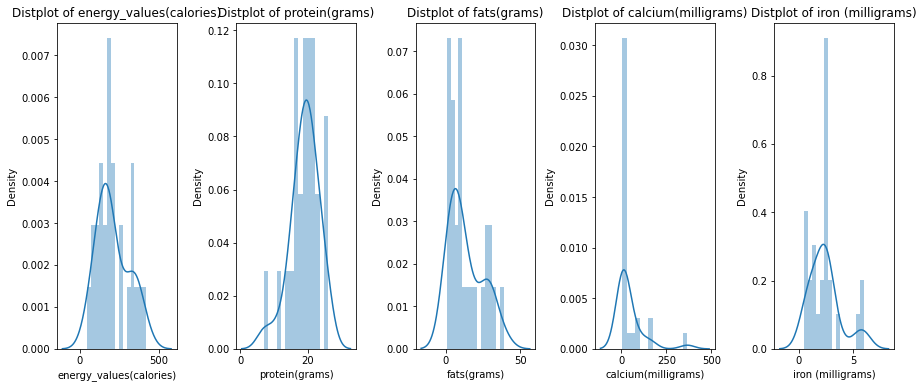

In [68]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ["energy_values(calories)","protein(grams)","fats(grams)","calcium(milligrams)","iron (milligrams)"]:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [69]:
df.columns

Index(['meat_type', 'energy_values(calories)', 'protein(grams)', 'fats(grams)',
       'calcium(milligrams)', 'iron (milligrams)'],
      dtype='object')

In [70]:
columns = ['energy_values(calories)', 'protein(grams)', 'fats(grams)','calcium(milligrams)', 'iron (milligrams)']

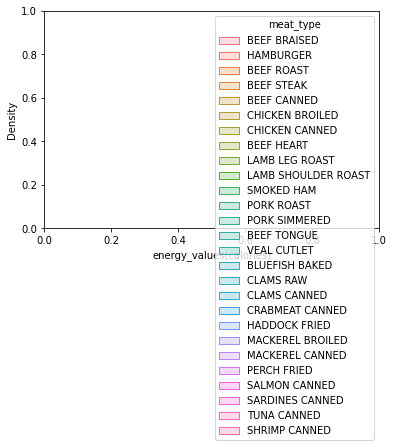

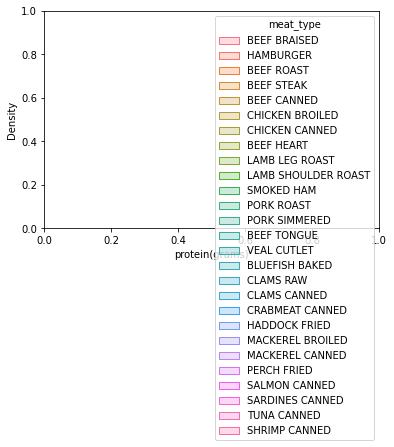

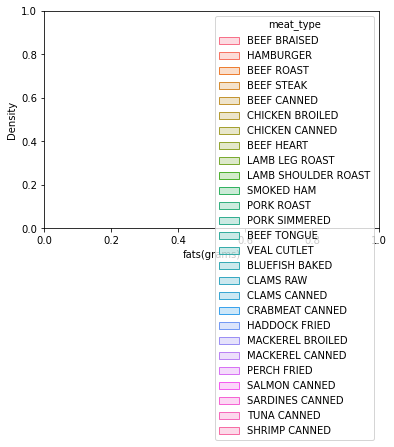

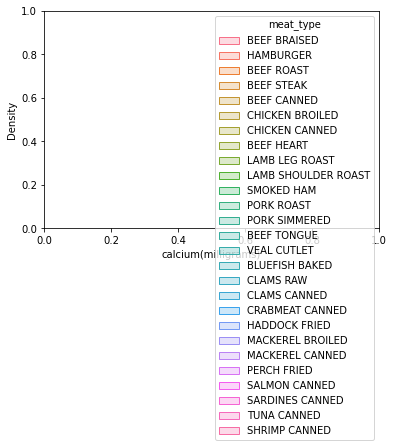

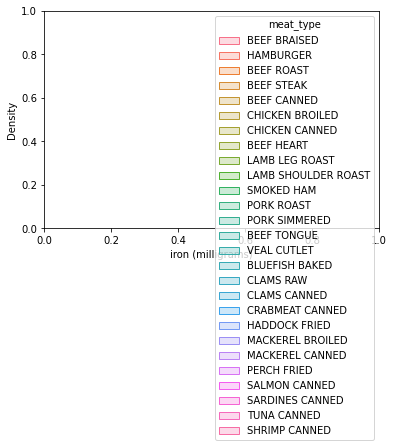

In [71]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for i in columns:
    plt.figure()
    sns.kdeplot(df[i],hue= df['meat_type'],shade=True )

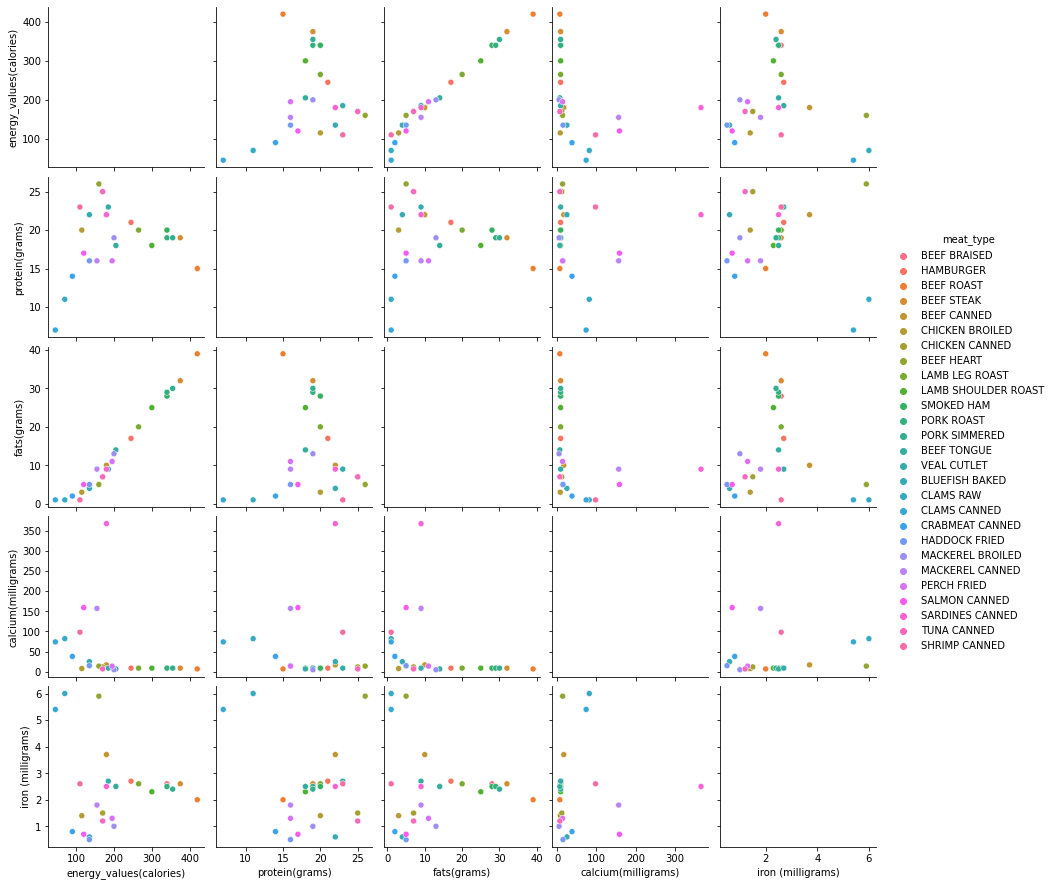

In [72]:
sns.pairplot(df,hue='meat_type')

In [73]:
X = pd.get_dummies(df)
X.head()

energy_values(calories)  protein(grams)  fats(grams)  calcium(milligrams)  \
0                      340              20           28                    9   
1                      245              21           17                    9   
2                      420              15           39                    7   
3                      375              19           32                    9   
4                      180              22           10                   17   

   iron (milligrams)  meat_type_BEEF BRAISED  meat_type_BEEF CANNED  \
0                2.6                       1                      0   
1                2.7                       0                      0   
2                2.0                       0                      0   
3                2.6                       0                      0   
4                3.7                       0                      1   

   meat_type_BEEF HEART  meat_type_BEEF ROAST  meat_type_BEEF STEAK  ...  \
0                     0                     0                     0  ...   
1                     0                     0                     0  ...   
2                     0                     1                     0  ...   
3                     0                     0                     1  ...   
4                     0                     0                     0  ...   

   meat_type_MACKEREL CANNED  meat_type_PERCH FRIED  meat_type_PORK ROAST  \
0                          0                      0                     0   
1                          0                      0                     0   
2                          0                      0                     0   
3                          0                      0                     0   
4                          0                      0                     0   

   meat_type_PORK SIMMERED  meat_type_SALMON CANNED  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   meat_type_SARDINES CANNED  meat_type_SHRIMP CANNED  meat_type_SMOKED HAM  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   meat_type_TUNA CANNED  meat_type_VEAL CUTLET  
0                      0                      0  
1                      0                      0  
2                      0                      0  
3                      0                      0  
4                      0                      0  

[5 rows x 32 columns]

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

Z = linkage(X, method='ward', metric='euclidean')

c, coph_dists = cophenet(Z, pdist(X))
c

0.6907371462783392

In [75]:
Z[0]

array([ 0.        , 10.        ,  1.41774469,  2.        ])

In [76]:
np.set_printoptions(precision=5, suppress=True)
Z[:20]

array([[ 0.     , 10.     ,  1.41774,  2.     ],
       [11.     , 27.     ,  2.16102,  3.     ],
       [ 6.     , 25.     ,  5.20481,  2.     ],
       [13.     , 20.     ,  5.93717,  2.     ],
       [ 4.     , 14.     ,  9.69536,  2.     ],
       [15.     , 19.     , 11.79025,  2.     ],
       [22.     , 30.     , 13.38917,  3.     ],
       [ 7.     , 29.     , 14.02153,  3.     ],
       [12.     , 28.     , 18.55694,  4.     ],
       [ 1.     ,  8.     , 20.29803,  2.     ],
       [31.     , 34.     , 25.62941,  5.     ],
       [16.     , 17.     , 26.59624,  2.     ],
       [ 5.     , 32.     , 27.06714,  3.     ],
       [21.     , 23.     , 35.34417,  2.     ],
       [ 3.     , 35.     , 39.77205,  5.     ],
       [ 9.     , 36.     , 52.60067,  3.     ],
       [18.     , 39.     , 54.59702,  4.     ],
       [33.     , 37.     , 55.10218,  8.     ],
       [26.     , 38.     , 66.96626,  3.     ],
       [ 2.     , 41.     , 91.44206,  6.     ]])

In [77]:
df.iloc[[0, 10, 22], :]

meat_type  energy_values(calories)  protein(grams)  fats(grams)  \
0   BEEF BRAISED                      340              20           28   
10    SMOKED HAM                      340              20           28   
22   PERCH FRIED                      195              16           11   

    calcium(milligrams)  iron (milligrams)  
0                     9                2.6  
10                    9                2.5  
22                   14                1.3

# 3.2 Draw the resulting dendrograms

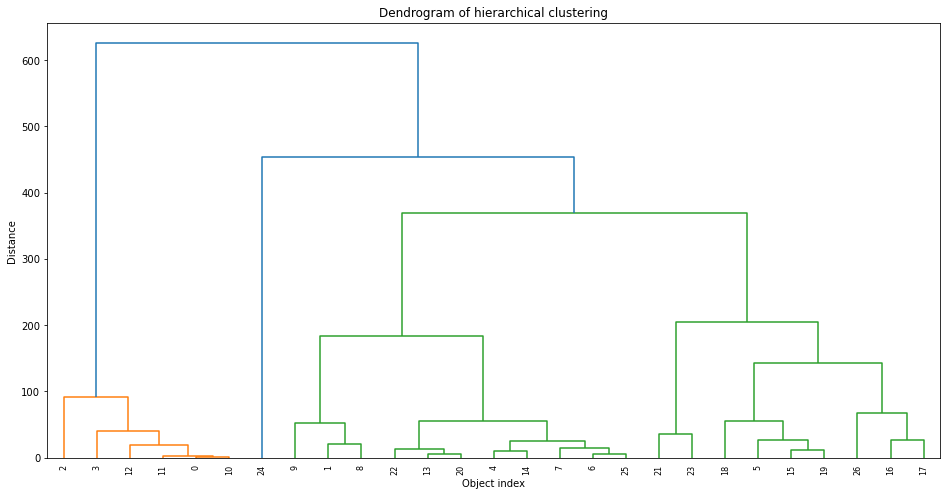

In [78]:
plt.figure(figsize=(16, 8))
plt.title('Dendrogram of hierarchical clustering')
plt.xlabel('Object index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotate labels 90 degrees
    leaf_font_size=8.,  # leaf label font size
)
plt.show()

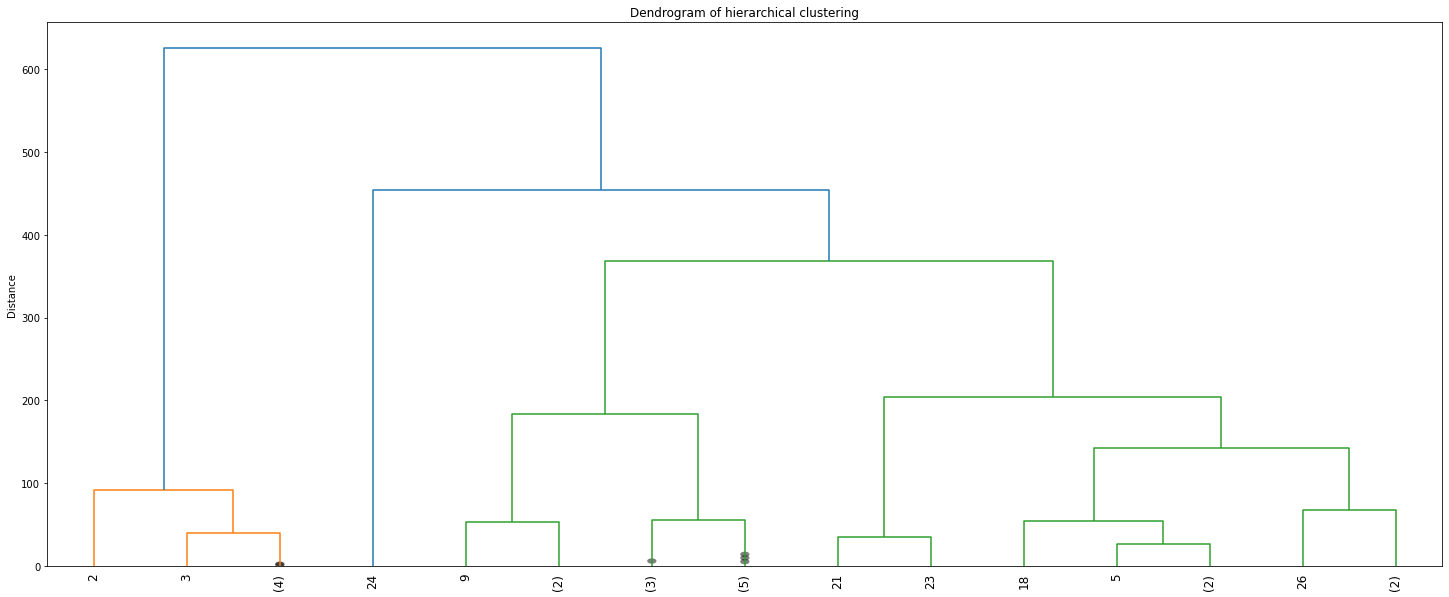

In [79]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram of hierarchical clustering')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only latest p clusters
    p=15,  # number of clusters to show
    show_leaf_counts=True,  # show number of objects in leaf nodes
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # show contracted branches
)
plt.show()

In [80]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

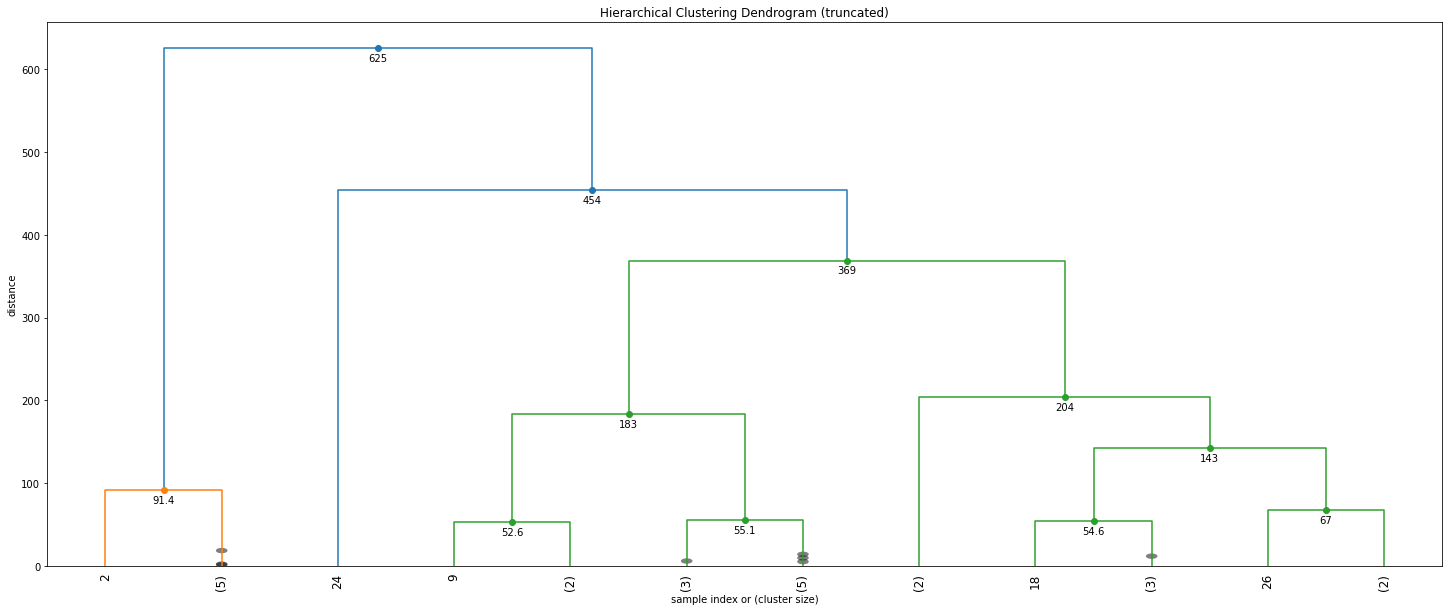

In [81]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  # lower threshold for the value of an annotated node
)
plt.show()

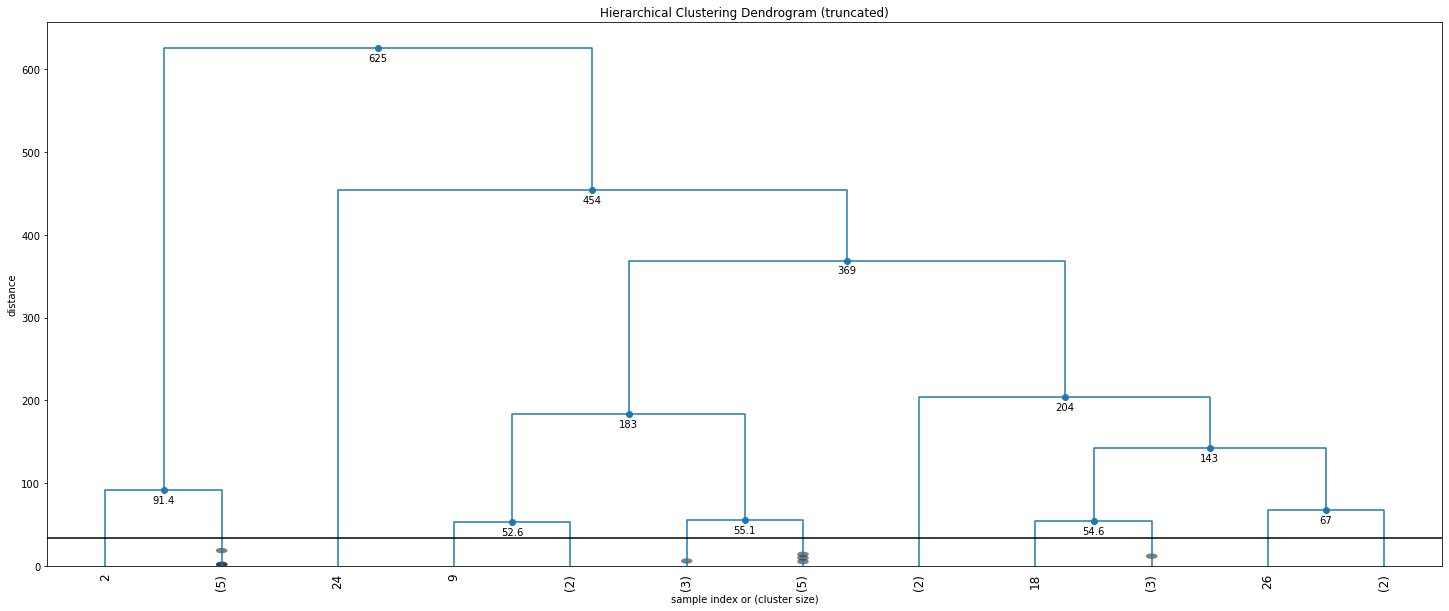

In [82]:
max_d = 34
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,
)
plt.show()

# 3.3 Select a threshold, form clusters and try to interpret them.

In [83]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 4,
       1, 4, 3, 1, 2], dtype=int64)

In [84]:
df['cluster'] = pd.DataFrame(y_hc)

In [85]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df["energy_values(calories)"],
    y= df["protein(grams)"],
    z= df["fats(grams)"],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = "energy_values(calories)"),
            yaxis = dict(title  = "protein(grams)"),
            zaxis = dict(title  = "fats(grams)")
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

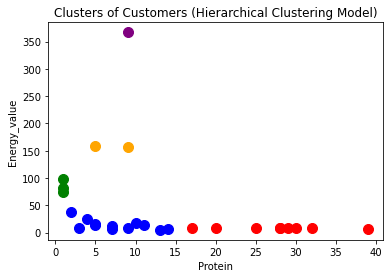

In [86]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Protein')
plt.ylabel('Energy_value')
plt.show()

Estimated number of clusters: 3


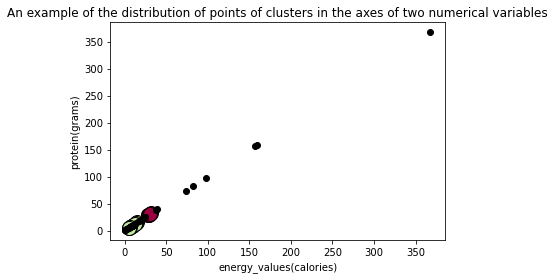

In [87]:
from sklearn.cluster import DBSCAN

num_features = ["energy_values(calories)","protein(grams)","fats(grams)","calcium(milligrams)","iron (milligrams)"]

db = DBSCAN(eps=2.8, min_samples=2, metric='euclidean').fit(X)
                                                                
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create an empty array with the same size as cluster label array
core_samples_mask[db.core_sample_indices_] = True # array of indicators of clusters' "inner points"
labels = db.labels_

# Counting the number of clusters excluding noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] # Exclude black from the color scheme.


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Use black for outliers
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy_core = X[class_member_mask & core_samples_mask]
    xy_not_core = X[class_member_mask & ~core_samples_mask]

    plt.plot(xy_core[:, ], xy_core[:, ], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.plot(xy_not_core[:, ], xy_not_core[:, ], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.xlabel(num_features[0])
plt.ylabel(num_features[1])
plt.title('An example of the distribution of points of clusters in the axes of two numerical variables')
plt.show()

# 3.4 Perform steps 1-3 with features instead of objects.

In [88]:
from sklearn.metrics import calinski_harabasz_score, silhouette_samples, silhouette_score
import matplotlib.cm as cm # needed to set a color scheme

def estimate_cluster(X, y_pred, name_of_alg=None):
    if not (name_of_alg is None):
        print(("Algorithm: " + name_of_alg))
    
    # Calinski-Harabaz - ratio between the within-cluster dispersion and the between-cluster dispersion
    # Greater is better: BCD/WCD
    print("Calinski-Harabaz: %.4f" % calinski_harabasz_score(X, y_pred))

    silhouette_avg = silhouette_score(X, y_pred)
    print("Average silhouette: %.4f" % silhouette_avg)

    n_clusters = len(np.unique(y_pred))

    # Show how silhouettes are chaged in each cluster
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlim([-0.1, 1])
    # 10 is needed for indentation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    # iterate over all the clusters
    for i in range(n_clusters):
        # Aggregate and sort silhouettes of objects in the cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("nipy_spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Print the number of the cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute a new lower boundary between cluster silhouettes 
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes of different clusters")
    ax1.set_xlabel("Silhouette value")
    ax1.set_ylabel("Cluster number")

    # Vertical line shows average value
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


Algorithm: DBSCAN, eps=2.8, min_samples=2
Calinski-Harabaz: 0.9421
Average silhouette: -0.0979


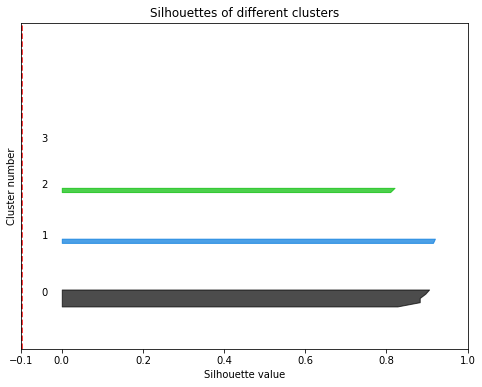

In [89]:
estimate_cluster(X, labels, 'DBSCAN, eps=2.8, min_samples=2')

In [90]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4).fit(X)
y_spectral_nn3 = spectral.labels_

In [91]:
spectral

SpectralClustering(affinity='nearest_neighbors', n_clusters=3, n_jobs=4)

Algorithm: Spectral clustering (nn), 3 clusters
Calinski-Harabaz: 11.0535
Average silhouette: 0.4030


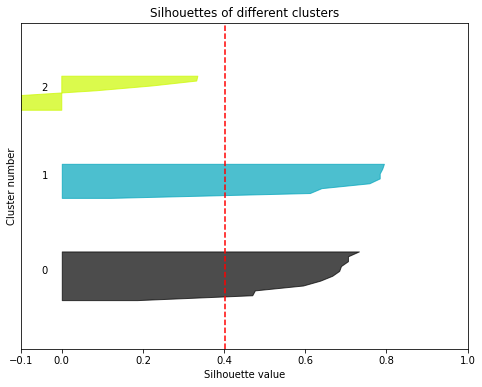

In [92]:
estimate_cluster(X, y_spectral_nn3, 'Spectral clustering (nn), 3 clusters')

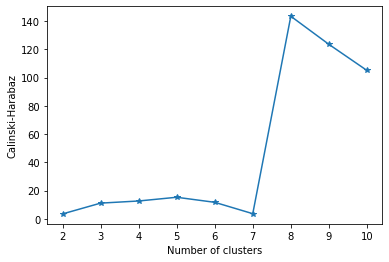

In [93]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4)
    spectral.fit(X)
    J.append(calinski_harabasz_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

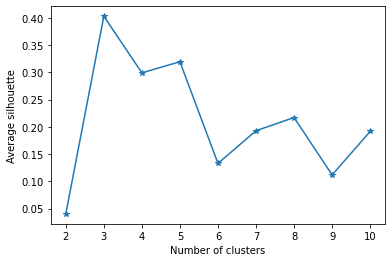

In [94]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4)
    spectral.fit(X)
    J.append(silhouette_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Algorithm: Spectral clustering (nn), 5 clusters
Calinski-Harabaz: 15.2375
Average silhouette: 0.3194


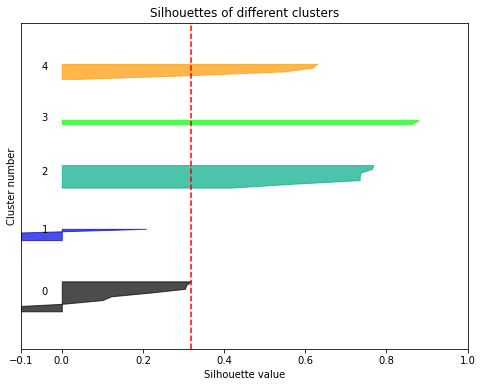

In [95]:
spectral = SpectralClustering(n_clusters=5
                              , affinity='nearest_neighbors', n_neighbors=10, n_jobs=4).fit(X)
y_spectral_nn5 = spectral.labels_
estimate_cluster(X, y_spectral_nn5, 'Spectral clustering (nn), 5 clusters')

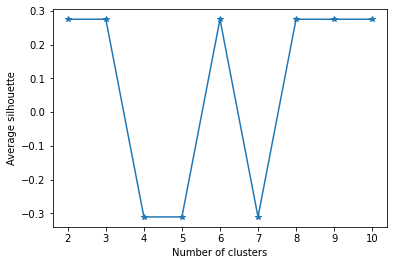

In [96]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', n_jobs=4)
    spectral.fit(X)
    J.append(silhouette_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

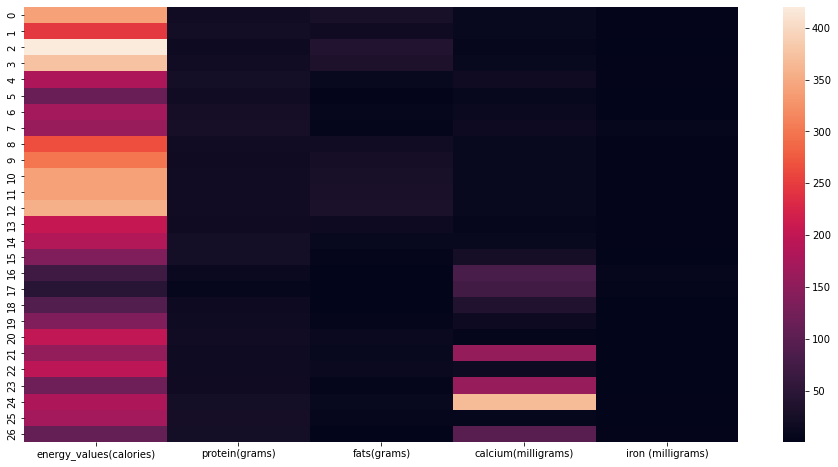

In [97]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df[num_features])
plt.show()

In [98]:
df=df.drop(['meat_type'],axis=1)
df.head()

energy_values(calories)  protein(grams)  fats(grams)  calcium(milligrams)  \
0                      340              20           28                    9   
1                      245              21           17                    9   
2                      420              15           39                    7   
3                      375              19           32                    9   
4                      180              22           10                   17   

   iron (milligrams)  cluster  
0                2.6        0  
1                2.7        0  
2                2.0        0  
3                2.6        0  
4                3.7        1

<AxesSubplot:>

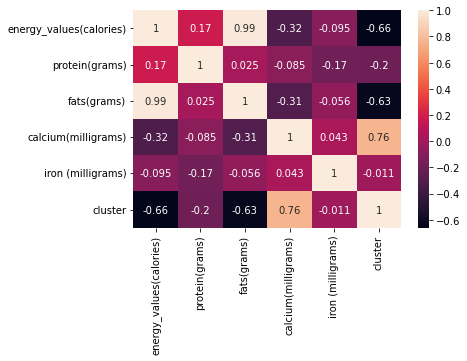

In [99]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

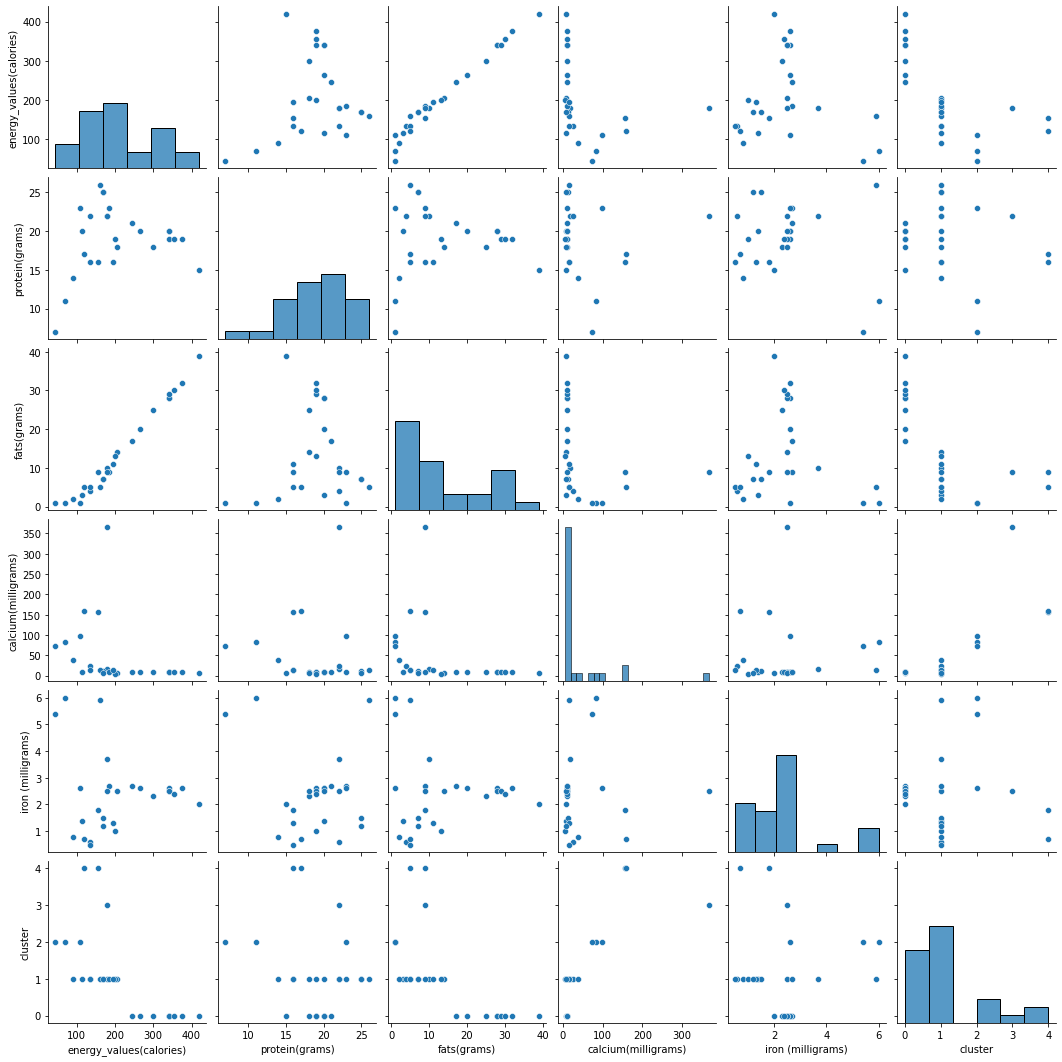

In [100]:
sns.pairplot(df)